### 1.

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np 
import pandas as pd

### 2.

In [2]:
# get data in train and test set
(trainX, trainY), (testX, testY) = mnist.load_data()

### 3.

In [3]:
# get current shape of the data
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [4]:
# convert shape to have single channel
trainX = trainX.reshape((-1, 28, 28, 1))
testX = testX.reshape((-1, 28, 28, 1))

# print new shape of the data
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

Train: X=(60000, 28, 28, 1), y=(60000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


### 4.

In [5]:
# print one label before encoding
print("Before one hot encoding : ")
print(trainY[0])

# convert train and test labels to be categorical one hot format
trainY_cat = to_categorical(trainY)
testY_cat = to_categorical(testY)

# print one label after one hot encoding
print("After one hot encoding : ")
print(trainY_cat[0])

Before one hot encoding : 
5
After one hot encoding : 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 5.

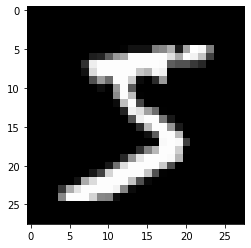

In [6]:
# print out one of the training images with it's label
plt.imshow(trainX[0], cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
# print out the corresponding label
print("One hot encoded label : ")
print(trainY_cat[0])

One hot encoded label : 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 6.

In [8]:
model = Sequential()

# 6.a 2D conv layer with 32 3x3 filters
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
# 6.b 2D conv layer with 64 3x3 filters 
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
# 6.c 2D maxpool layer to distill results
model.add(MaxPooling2D((2, 2)))
# 6.d add dropout filter to prevent overfitting
model.add(Dropout(0.2))
# 6.e flatten 2D layer into 1D layer
model.add(Flatten())
# hidden flat layer of 128 units 
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# 6.f apply dropout to further prevent overfitting
model.add(Dropout(0.2))
# 6.g feed into final 10 units where softmax is applied
model.add(Dense(10, activation='softmax'))
# 6.h check the model description
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

### 7.

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(trainX, trainY_cat, epochs=10, batch_size=32, validation_data=(testX, testY_cat))

Epoch 1/10
1875/1875 [==============================] - 51s 27ms/step - loss: 1.9340 - accuracy: 0.8394 - val_loss: 0.1878 - val_accuracy: 0.9537
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2684 - accuracy: 0.9306 - val_loss: 0.1590 - val_accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2130 - accuracy: 0.9445 - val_loss: 0.0979 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1695 - accuracy: 0.9562 - val_loss: 0.0914 - val_accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1342 - accuracy: 0.9652 - val_loss: 0.0830 - val_accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1167 - accuracy: 0.9694 - val_loss: 0.0688 - val_accuracy: 0.9826
Epoch 7/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1061 - accuracy: 0.9722 - val_loss: 0.0674 -

In [11]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


### 8.

<AxesSubplot:>

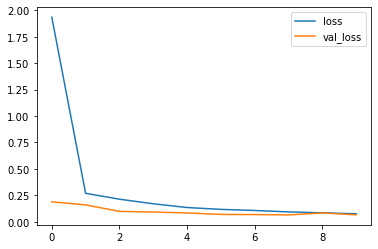

In [12]:
losses = pd.DataFrame(model.history.history)
loss_plot = losses[['loss', 'val_loss']]
loss_plot.plot()

In [13]:
# get predictions on test set
predictions = model.predict(testX)

# get index of maximum value for each sample
predicts = np.argmax(predictions, axis=1)

In [14]:
# display confusion matrix
print(confusion_matrix(testY, predicts))

[[ 973    0    3    0    0    0    2    0    2    0]
 [   0 1128    1    0    1    1    2    2    0    0]
 [   1    0 1021    1    1    0    0    6    2    0]
 [   0    0    6  987    0    6    0    4    6    1]
 [   1    0    0    0  967    0    3    1    5    5]
 [   2    0    0    4    0  882    3    0    0    1]
 [   8    0    0    0    1    6  942    0    1    0]
 [   0    2    6    3    2    1    0 1014    0    0]
 [   2    0    6    3    1    1    1    1  958    1]
 [   0    1    0    1   10    9    0    9   20  959]]


In [15]:
# display classification report
print(classification_report(testY, predicts))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

